# Computer Vision

In [1]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

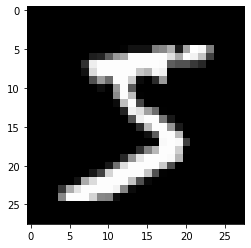

In [3]:
plt.imshow(train_images[0], cmap=plt.get_cmap('gray'))
plt.show()

In [4]:
print('Train Shape:', train_images.shape)
print('Test Shape:', test_images.shape)

Train Shape: (60000, 28, 28)
Test Shape: (10000, 28, 28)


In [5]:
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
# Convolutional Layers expect the data to 
# have four dimensions:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

### Create a baseline model - No Convolution

In [ ]:
# Import a Sequential model
# ===================
# YOUR CODE HERE
# ===================

# Import Dense, Flatten and Input layers
# ===================
# YOUR CODE HERE
# ===================

# Define a function called `baseline_model`
# with an input called `image`
# ===================
# YOUR CODE HERE
# ===================
    
    # Create a list called `layers`.
    # This list should contain all of the layers
    # of the model.
    #### The model should have the following architecture:
    ####### 1. Input layer
    ####### 2. Flatten layer
    ####### 3. A dense layer
    #######      - 100 units
    #######      - Relu activation
    ####### 4. A dense output layer
    #######      - The number are labels = number of units
    #######      - A softmax activation
    # ===================
    # YOUR CODE HERE
    # ===================
    
    # Create a Sequential model and 
    # add the layers
    # ===================
    # YOUR CODE HERE
    # =================== 
        
    # Compile model
    #### Set loss to sparse categorical cross entropy
    #### Set the optimizer to adam
    #### Use accuracy for the metric
    # ===================
    # YOUR CODE HERE
    # =================== 
    
    # Return the model
    # ===================
    # YOUR CODE HERE
    # ===================

In [ ]:
# Initialize the model
# ===================
# YOUR CODE HERE
# ===================

In [ ]:
# Output a summary
# ===================
# YOUR CODE HERE
# ===================

In [ ]:
# Fit the model
# Use 20% of your training data for validation
# ===================
# YOUR CODE HERE
# ===================

# Convolutional Neural Networks

A convolutional neural network is a neural network with **convolutional layers**. CNNs are mainly used for image recognition/classification. They can be used for video analysis, NLP (sentiment analysis, topic modeling), and speech recognition. 

### How do our brains see an image? 

We might see some fluffy tail, a wet nose, flappy ears, and a good boy and conclude we are probably seeing a dog. There is not one singular thing about a dog that our brain recognizes as a dog but an amalgamation of different patterns that allow us to make a probable guess.  

<img src='images/chihuahua.jpeg'/>

### How do computers see images?

<img src='images/architecture.jpeg' width=700/>

To computers, color images are a 3D object - composed of 3 matrices - one for each primary color that can be combined in varying intensities to create different colors. Each element in a matrix represents the location of a pixel and contains a number between 0 and 255 which indicates the intensity of the corresponding primary color in that pixel.

<img src='images/rgb.png'/>

## Convolutions

**To *convolve* means to roll together**. CNNs make use of linear algebra to identify patterns using the pixel values (intensity of R,G, or B). By **taking a small matrix and moving it across an image and multiplying them together every time it moves**, our network can mathematically identify patterns in these images. This small matrix is known as a *kernel* or *filter* and each one is designed to identify a particular pattern in an image (edges, shapes, etc.)

<img src='images/convolve.gif' width=500/>

When a filter is "rolled over" an image, the resulting matrix is called a **feature map** - literally a map of where each pattern of feature is in the image. Elements with higher values indicate the presence of a pattern the filter is looking for. The values (or weights) of the filter are adjusted during back-propagation.

### Let's look at a simple example to illustrate what a convolution layer is doing.

$\begin{bmatrix}
    10 & 10 & 10 & 0 & 0 & 0  \\
    10 & 10 & 10 & 0 & 0 & 0  \\
    10 & 10 & 10 & 0 & 0 & 0  \\
    10 & 10 & 10 & 0 & 0 & 0  \\
    10 & 10 & 10 & 0 & 0 & 0 \\
    10 & 10 & 10 & 0 & 0 & 0  \\
\end{bmatrix}\space*\
\begin{bmatrix}
    1 & 0 & -1 \\
    1 & 0 & -1 \\
    1 & 0 & -1 \\ 
\end{bmatrix}=\
\begin{bmatrix}
    0 & 30 & 30 & 0 \\
    0 & 30 & 30 & 0 \\
    0 & 30 & 30 & 0 \\
    0 & 30 & 30 & 0 \\
\end{bmatrix}$


Check out **[this excellent tool](https://deeplizard.com/resource/pavq7noze2)** to explore how filters isolate different features of an image. 

#### Convolutional layer parameters

1. Padding: sometimes it is convenient to pad the input volume with zeros around the border. Helps with detecting patterns at the edge of an image
1. Stride: the number of pixels to shift the filter on each "roll". The larger the stride, the smaller the feature map will be - but we will lose more information
1. Kernel Regularization
    - This represented the regularization for the weights inside the convolutional filter. 

## Create a basic Convolutional Network Model

In [ ]:
# Import A 2-d Convolutional layer and 2-d Maxpooling 
# ===================
# YOUR CODE HERE
# ===================

# Define a function to build your model
# That receives a single image as an input
# ===================
# YOUR CODE HERE
# ===================

    # Create a list of layers
    ##### Input layer
    ##### Convolutional layer
    ########## - 32 filters
    ########## - Filter size with width and height of 3
    ########## - Activation: Your choice!
    ##### A flattening layer
    ##### A dense layer
    ########## - Units: 128
    ########## - Activation: Your choice!
    ##### A dense layer
    ########## - Units: The number of target classes
    ########## - Activation: Softmax
    # ===================
    # YOUR CODE HERE
    # ===================
    
    # Add the layers to a Sequential model
    # ===================
    # YOUR CODE HERE
    # ===================
    
    # Compile the model
    ##### Loss: Sparse Categorical Crossentropy
    ##### Optimizer: Adam
    ##### Metric: Accuracy
    # ===================
    # YOUR CODE HERE
    # ===================
    
    # Return the model
    # ===================
    # YOUR CODE HERE
    # ===================

In [ ]:
# Initialize the model
# ===================
# YOUR CODE HERE
# ===================

In [ ]:
# Output a summary
# ===================
# YOUR CODE HERE
# ===================

In [ ]:
# Fit the model
# Use 20% of train as validation
# ===================
# YOUR CODE HERE
# ===================

# Some Classic Architectures

## LeNet - 5

In [ ]:
# Import a 2-D average pooling layer
# ===================
# YOUR CODE HERE
# ===================

# Define function called 
# `LeNet5` that receives a single image
# as an input
# ===================
# YOUR CODE HERE
# ===================

    layers = [
        # Input layer
        # ===================
        # YOUR CODE HERE
        # ===================
        # Convolution layer 
        ##### Filters: 6
        ##### Filter size: 5
        ##### Activation: relu
        # ===================
        # YOUR CODE HERE
        # ===================
        # Average Pooling
        ##### Side: 2
        # ===================
        # YOUR CODE HERE
        # ===================
        # Convolution layer
        ##### Filters: 16
        ##### Filter size: 5
        ##### Activation: relu
        # ===================
        # YOUR CODE HERE
        # ===================
        # Average Pooling layer
        ##### Size: 2
        # ===================
        # YOUR CODE HERE
        # ===================
        # Flatten layer
        # ===================
        # YOUR CODE HERE
        # ===================
        # Dense layer
        ##### Number of units: 120
        ##### Activation: relu
        # ===================
        # YOUR CODE HERE
        # ===================
        # Dense layer
        ##### Number of units: 82
        ##### Activation: relu
        # ===================
        # YOUR CODE HERE
        # ===================
        # Dense layer
        ##### Number of units: Number of class labels
        ##### Activation: softmax
        # ===================
        # YOUR CODE HERE
        # ===================
        ]
    
    # Add layers to a sequential model
    # ===================
    # YOUR CODE HERE
    # ===================
    
    # Compile model
    # ===================
    # YOUR CODE HERE
    # ===================
    
    # Return model
    # ===================
    # YOUR CODE HERE
    # ===================

In [ ]:
# Import a 2-D average pooling layer
from tensorflow.keras.layers import AveragePooling2D

# Define function called 
# `LeNet5` that receives a single image
# as an input
def LeNet5(image):
    
    layers = [
        # Input layer
        Input(image.shape),
        # Convolution layer 
        ##### Filters: 6
        ##### Filter size: 5
        ##### Activation: relu
        Conv2D(6, (5, 5), activation='relu'),
        # Average Pooling
        ##### Side: 2
        AveragePooling2D((2,2)),
        # Convolution layer
        ##### Filters: 16
        ##### Filter size: 5
        ##### Activation: relu
        Conv2D(16, (5,5), activation='relu'),
        # Average Pooling layer
        ##### Size: 2
        AveragePooling2D((2,2)),
        # Flatten layer
        Flatten(),
        # Dense layer
        ##### Number of units: 120
        ##### Activation: relu
        Dense(120, activation='relu'),
        # Dense layer
        ##### Number of units: 82
        ##### Activation: relu
        Dense(82, activation='relu'),
        # Dense layer
        ##### Number of units: Number of class labels
        ##### Activation: softmax
        Dense(10, activation='softmax'),
        ]
    
    # Add layers to a sequential model
    model = Sequential(layers)
    
    # Compile model
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    # Return model
    return model

In [ ]:
model_3 = LeNet5(train_images[0])
model_3.fit(train_images, train_labels, validation_split=.2, epochs=10, batch_size=1000)

In [ ]:
from tensorflow.keras.layers import BatchNormalization, Dropout

def AlexNet(image):
    
    layers = [
        Input(image.shape),
        Conv2D(96, (11,11), activation = 'relu'),
        BatchNormalization(),
        MaxPooling2D((3,3)),
        Conv2D(256, (5,5), padding='same', activation='relu'),
        BatchNormalization(),
        MaxPooling2D((3,3)),
        Conv2D(384, (3,3), padding='same', activation='relu'),
        BatchNormalization(),
        Conv2D(384, (3,3), activation='relu'),
        BatchNormalization(),
        Conv2D(256, (3,3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((3,3)),
        Flatten(),
        Dense(9216, activation='relu'),
        Dropout(.5),
        Dense(4096, activation='relu'),
        Dropout(.5),
        Dense(4096, activation='relu'),
        Dropout(.5),
        Dense(10, activation='softmax')
    ]
    
    model = Sequential(layers)
    
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    return model  

In [ ]:
import numpy as np

def pad_images(images, pad=10):

    return np.pad(images,((0,0),(pad,pad),(pad,pad),(0,0)))

In [ ]:
padded_images = pad_images(train_images, pad=100)
model_4 = AlexNet(padded_images[0])

In [ ]:
model_4.fit(padded_images, train_labels, validation_split=.2, epochs=10, batch_size=64)

In [ ]:
def VGG16(image):
    
    layers = [
        Input(image.shape),
        Conv2D(64, (3,3), activation='relu', padding='same'),
        Conv2D(64, (3,3), activation='relu', padding='same'),
        MaxPooling2D((2,2)),
        Conv2D(128, (3,3), activation='relu', padding='same'),
        Conv2D(128, (3,3), activation='relu', padding='same'),
        MaxPooling2D((2,2)),
        Conv2D(256, (3,3), activation='relu', padding='same'),
        Conv2D(256, (3,3), activation='relu', padding='same'),
        Conv2D(256, (3,3), activation='relu', padding='same'),
        MaxPooling2D((2,2)),
        Conv2D(512, (3,3), activation='relu', padding='same'),
        Conv2D(512, (3,3), activation='relu', padding='same'),
        Conv2D(512, (3,3), activation='relu', padding='same'),
        MaxPooling2D((2,2)),
        Conv2D(512, (3,3), activation='relu', padding='same'),
        Conv2D(512, (3,3), activation='relu', padding='same'),
        Conv2D(512, (3,3), activation='relu', padding='same'),
        MaxPooling2D((2,2)),
        Flatten(),
        Dense(4096, activation='relu'),
        Dense(4096, activation='relu'),
        Dense(100, activation='softmax')
    ]
    
    model = Sequential(layers)
    
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    return model      

In [ ]:
model_5 = VGG16(padded_images[0])
model_5.fit(padded_images, train_labels, validation_split=.2, epochs=10, batch_size=100)

This model is so frequently used that a stock `VGG16` model is available as a **transfer learning** model.

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

model_6 = VGG16()

In [ ]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Add, BatchNormalization, Activation

def SimpleResNet(image):

    input_layer = Input(image.shape)
   
    X = Conv2D(64, (3,3), activation='relu')(input_layer)
    X = BatchNormalization()(X)
    
    X_shortcut = X

    X = Conv2D(64, (3,3), padding='same', activation='relu')(X)
    X = BatchNormalization()(X)

    X = Add()([X, X_shortcut] )# Skip Connection
    X = Activation('relu')(X)
    X = Flatten()(X)
    X = Dense(10, activation='softmax')(X)

    model = Model(inputs=input_layer, outputs=X, name='ResNet')
    
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    return model 

In [ ]:
model_7 = SimpleResNet(train_images[0])

In [ ]:
model_7.fit(train_images, train_labels, validation_split=.2, epochs=10, batch_size=100)

In [ ]:
%config Completer.use_jedi = False

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout


def CustomResNet50(image):
    
    
    
    base_model = ResNet50(include_top=False,
                          weights=None,
                          input_shape=image.shape)
    
    X = base_model.output
    X = GlobalAveragePooling2D()(X)
    X = Dropout(.5)(X)
    X = Dense(10, activation='softmax')(X)

    
    model = Model(inputs = base_model.input, outputs=X)
    
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    return model 

In [ ]:
resnet_images = pad_images(train_images)

In [ ]:
model_8 = CustomResNet50(resnet_images[0])

In [ ]:
model_8.fit(resnet_images, train_labels, validation_split=.2, epochs=10, batch_size=100)